In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pds

/Users/vishal/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


ModuleNotFoundError: No module named 'pandas'

In [4]:
import os
import pandas as pd

def load_election_data(base_folder):
    state_data = {}
    for state_folder in os.listdir(base_folder):
        state_path = os.path.join(base_folder, state_folder)
        if os.path.isdir(state_path):
            state_data[state_folder] = {}
            for party_folder in os.listdir(state_path):
                party_path = os.path.join(state_path, party_folder)
                if os.path.isdir(party_path):
                    for file in os.listdir(party_path):
                        if file.endswith('.csv'):
                            csv_path = os.path.join(party_path, file)
                            df = pd.read_csv(csv_path)
                            state_data[state_folder][party_folder] = df
    return state_data

def calculate_dominance(state_data):
    dominance_results = {}
    
    for state, parties in state_data.items():
        dominance_results[state] = {}
        total_constituencies = 0
        
        for party, df in parties.items():
            total_constituencies += len(df)
        for party, df in parties.items():
            constituencies_won = len(df)
            dominance_percentage = (constituencies_won / total_constituencies) * 100
            dominance_results[state][party] = dominance_percentage
            
    return dominance_results



In [5]:
base_folder = 'state'
state_data = load_election_data(base_folder)
dominance_results = calculate_dominance(state_data)

print("Dominance Results:")
for state, parties in dominance_results.items():
    print(f"{state}:")
    for party, dominance in parties.items():
        print(f"  {party}: {dominance:.2f}%")

Dominance Results:
Andaman & Nicobar Islands:
  Bharatiya Janata Party - BJP: 100.00%
Andhra Pradesh:
  Bharatiya Janata Party - BJP: 12.00%
  Janasena Party - JnP: 8.00%
  Telugu Desam - TDP: 64.00%
  Yuvajana Sramika Rythu Congress Party - YSRCP: 16.00%
Arunachal Pradesh:
  Bharatiya Janata Party - BJP: 100.00%
Assam:
  Asom Gana Parishad - AGP: 7.14%
  Bharatiya Janata Party - BJP: 64.29%
  Indian National Congress - INC: 21.43%
  United People’s Party, Liberal - UPPL: 7.14%
Bihar:
  Bharatiya Janata Party - BJP: 30.00%
  Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L): 5.00%
  Hindustani Awam Morcha (Secular) - HAMS: 2.50%
  Independent - IND: 2.50%
  Indian National Congress - INC: 7.50%
  Janata Dal  (United) - JD(U): 30.00%
  Lok Janshakti Party(Ram Vilas) - LJPRV: 12.50%
  Rashtriya Janata Dal - RJD: 10.00%
Chandigarh:
  Indian National Congress - INC: 100.00%
Chhattisgarh:
  Bharatiya Janata Party - BJP: 90.91%
  Indian National Congress - INC: 9.09%
Da

Average Margin of Victory

Average Margin of Victory for Each Party:
Bharatiya Janata Party - BJP: 192809.77
Janasena Party - JnP: 226335.00
Telugu Desam - TDP: 228807.94
Yuvajana Sramika Rythu Congress Party - YSRCP: 50978.75
Asom Gana Parishad - AGP: 222351.00
Indian National Congress - INC: 131372.95
United People’s Party, Liberal - UPPL: 51583.00
Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L): 82833.00
Hindustani Awam Morcha (Secular) - HAMS: 101812.00
Independent - IND: 89900.29
Janata Dal  (United) - JD(U): 115534.42
Lok Janshakti Party(Ram Vilas) - LJPRV: 144120.60
Rashtriya Janata Dal - RJD: 84241.75
Jammu & Kashmir National Conference - JKN: 235105.00
AJSU Party - AJSUP: 80880.00
Jharkhand Mukti Morcha - JMM: 123064.33
Janata Dal  (Secular) - JD(S): 178004.00
Communist Party of India  (Marxist) - CPI(M): 186559.25
Indian Union Muslim League - IUML: 234220.00
Kerala Congress - KEC: 87266.00
Revolutionary Socialist Party - RSP: 150302.00
Nationalist Congress Party - NCP: 82784.00


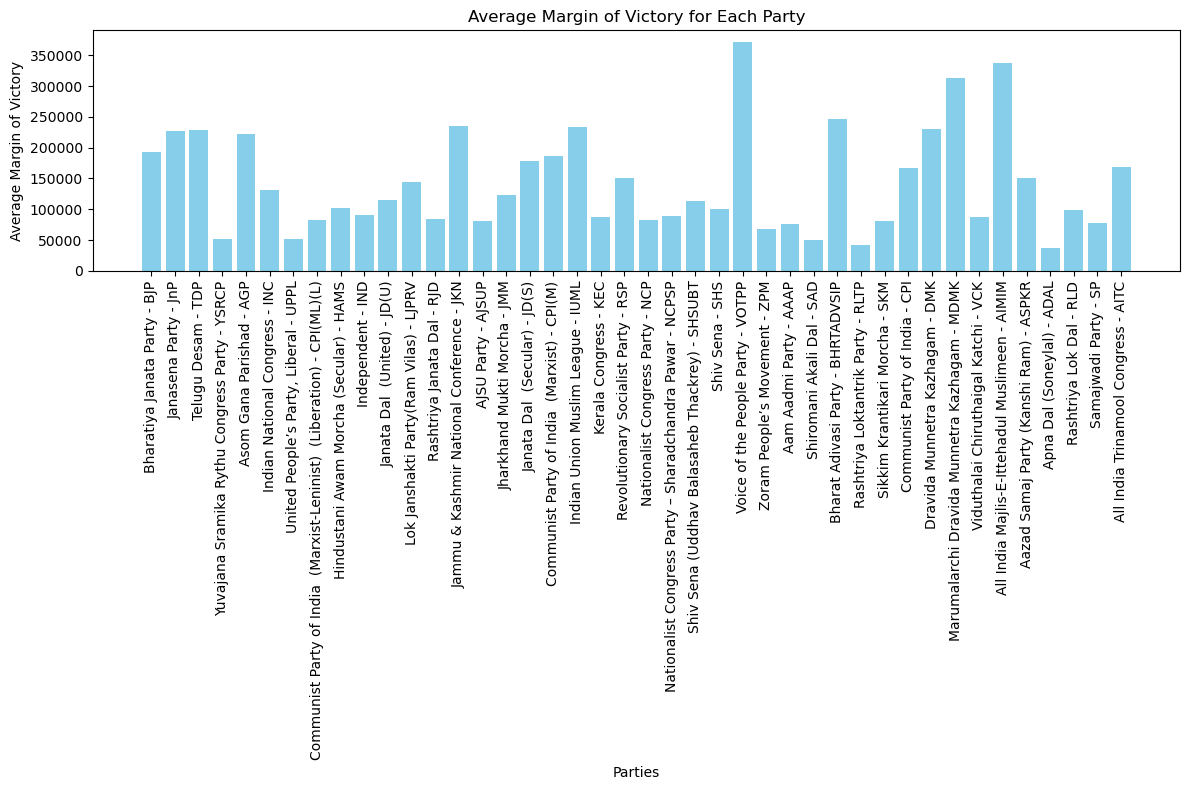

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
base_folder = 'state'

def load_election_data(base_folder):
    state_data = {}
    for state_folder in os.listdir(base_folder):
        state_path = os.path.join(base_folder, state_folder)
        if os.path.isdir(state_path):
            state_data[state_folder] = {}
            for party_folder in os.listdir(state_path):
                party_path = os.path.join(state_path, party_folder)
                if os.path.isdir(party_path):
                    for file in os.listdir(party_path):
                        if file.endswith('.csv'):
                            csv_path = os.path.join(party_path, file)
                            df = pd.read_csv(csv_path)
                            df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
                            df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')
                            state_data[state_folder][party_folder] = df
    return state_data

def calculate_average_margin(state_data):
    average_margin = {}
    
    for state, parties in state_data.items():
        for party, df in parties.items():
            if party not in average_margin:
                average_margin[party] = []
            average_margin[party].extend(df['Margin'].dropna().tolist())
    
    average_margin = {party: sum(margins)/len(margins) if margins else 0 for party, margins in average_margin.items()}
    
    return average_margin

def calculate_total_seats(state_data):
    total_seats = {}
    
    for state, parties in state_data.items():
        for party, df in parties.items():
            if party not in total_seats:
                total_seats[party] = 0
            total_seats[party] += len(df)
    
    return total_seats

state_data = load_election_data(base_folder)
average_margin = calculate_average_margin(state_data)
total_seats = calculate_total_seats(state_data)

print("Average Margin of Victory for Each Party:")
for party, margin in average_margin.items():
    print(f"{party}: {margin:.2f}")

plt.figure(figsize=(12, 8))
plt.bar(average_margin.keys(), average_margin.values(), color='skyblue')
plt.xlabel('Parties')
plt.ylabel('Average Margin of Victory')
plt.title('Average Margin of Victory for Each Party')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

required_majority = 272
party_closest_to_majority = max(total_seats, key=lambda party: min(total_seats[party], required_majority))
margin_to_majority = required_majority - total_seats[party_closest_to_majority]


Party Closest to Majority

In [9]:
print(f"\nParty closest to majority: {party_closest_to_majority} with {total_seats[party_closest_to_majority]} seats")
print(f"Margin to majority: {margin_to_majority} seats")


Party closest to majority: Bharatiya Janata Party - BJP with 240 seats
Margin to majority: 32 seats


Candidate with Margin of Victory < 100000

In [10]:
import os
import pandas as pd

base_folder = 'state'

def load_election_data(base_folder):
    state_data = {}
    for state_folder in os.listdir(base_folder):
        state_path = os.path.join(base_folder, state_folder)
        if os.path.isdir(state_path):
            state_data[state_folder] = {}
            for party_folder in os.listdir(state_path):
                party_path = os.path.join(state_path, party_folder)
                if os.path.isdir(party_path):
                    for file in os.listdir(party_path):
                        if file.endswith('.csv'):
                            csv_path = os.path.join(party_path, file)
                            df = pd.read_csv(csv_path)
                            df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
                            df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')
                            state_data[state_folder][party_folder] = df
    return state_data

def find_close_contests(state_data, margin_threshold=10000):
    close_contests = []
    
    for state, parties in state_data.items():
        for party, df in parties.items():
            for _, row in df.iterrows():
                if row['Margin'] < margin_threshold:
                    close_contests.append({
                        'State': state,
                        'Party': party,
                        'Parliament Constituency': row['Parliament Constituency'],
                        'Winning Candidate': row['Winning Candidate'],
                        'Total Votes': row['Total Votes'],
                        'Margin': row['Margin']
                    })
    
    return close_contests

state_data = load_election_data(base_folder)
close_contests = find_close_contests(state_data)

print("Close Contests (Margin of Victory < 10,000 Votes):")
for contest in close_contests:
    print(f"State: {contest['State']}, Party: {contest['Party']}, "
          f"Parliament Constituency: {contest['Parliament Constituency']}, "
          f"Winning Candidate: {contest['Winning Candidate']}, "
          f"Total Votes: {contest['Total Votes']}, Margin: {contest['Margin']}")


Close Contests (Margin of Victory < 10,000 Votes):
State: Chandigarh, Party: Indian National Congress - INC, Parliament Constituency: Chandigarh(1), Winning Candidate: MANISH TEWARI, Total Votes: 216657, Margin: 2504
State: Chhattisgarh, Party: Bharatiya Janata Party - BJP, Parliament Constituency: KANKER(11), Winning Candidate: BHOJRAJ NAG, Total Votes: 597624, Margin: 1884
State: Dadra & Nagar Haveli and Daman & Diu, Party: Independent - IND, Parliament Constituency: Daman & Diu (1), Winning Candidate: PATEL UMESHBHAI BABUBHAI, Total Votes: 42523, Margin: 6225
State: Kerala, Party: Indian National Congress - INC, Parliament Constituency: Attingal(19), Winning Candidate: ADV ADOOR PRAKASH, Total Votes: 328051, Margin: 684
State: Lakshadweep, Party: Indian National Congress - INC, Parliament Constituency: Lakshadweep(1), Winning Candidate: MUHAMMED HAMDULLAH SAYEED, Total Votes: 25726, Margin: 2647
State: Maharashtra, Party: Indian National Congress - INC, Parliament Constituency: Dhul

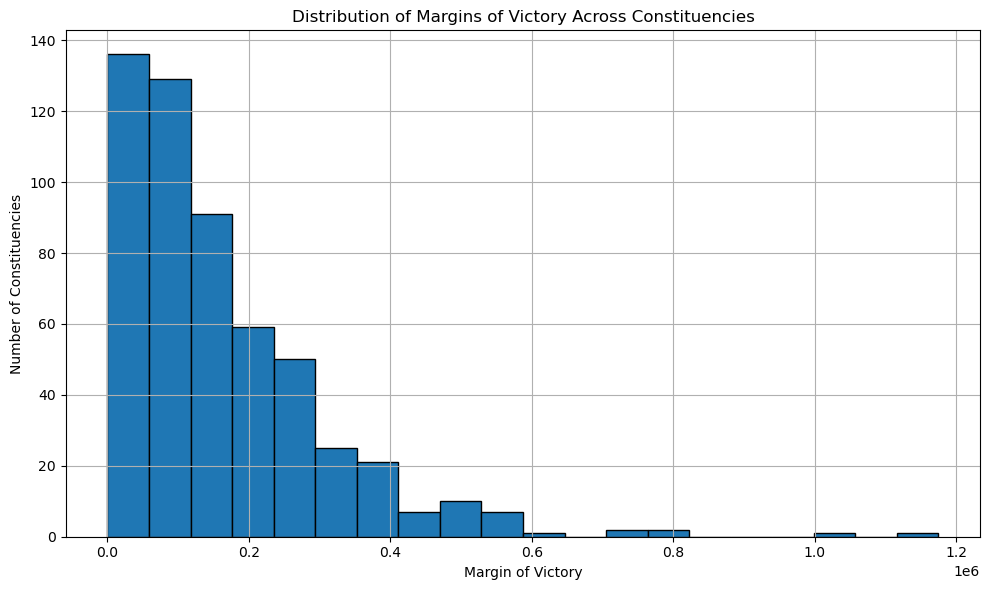

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_folder = 'state'

def load_election_data(base_folder):
    state_data = {}
    for state_folder in os.listdir(base_folder):
        state_path = os.path.join(base_folder, state_folder)
        if os.path.isdir(state_path):
            state_data[state_folder] = {}
            for party_folder in os.listdir(state_path):
                party_path = os.path.join(state_path, party_folder)
                if os.path.isdir(party_path):
                    for file in os.listdir(party_path):
                        if file.endswith('.csv'):
                            csv_path = os.path.join(party_path, file)
                            df = pd.read_csv(csv_path)
                            df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
                            df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')
                            state_data[state_folder][party_folder] = df
    return state_data

def extract_margins_of_victory(state_data):
    margins = []
    for state, parties in state_data.items():
        for party, df in parties.items():
            margins.extend(df['Margin'].dropna().tolist())
    return margins

state_data = load_election_data(base_folder)

margins_of_victory = extract_margins_of_victory(state_data)


plt.figure(figsize=(10, 6))
plt.hist(margins_of_victory, bins=20, edgecolor='black')
plt.title('Distribution of Margins of Victory Across Constituencies')
plt.xlabel('Margin of Victory')
plt.ylabel('Number of Constituencies')
plt.grid(True)
plt.tight_layout()
plt.show()


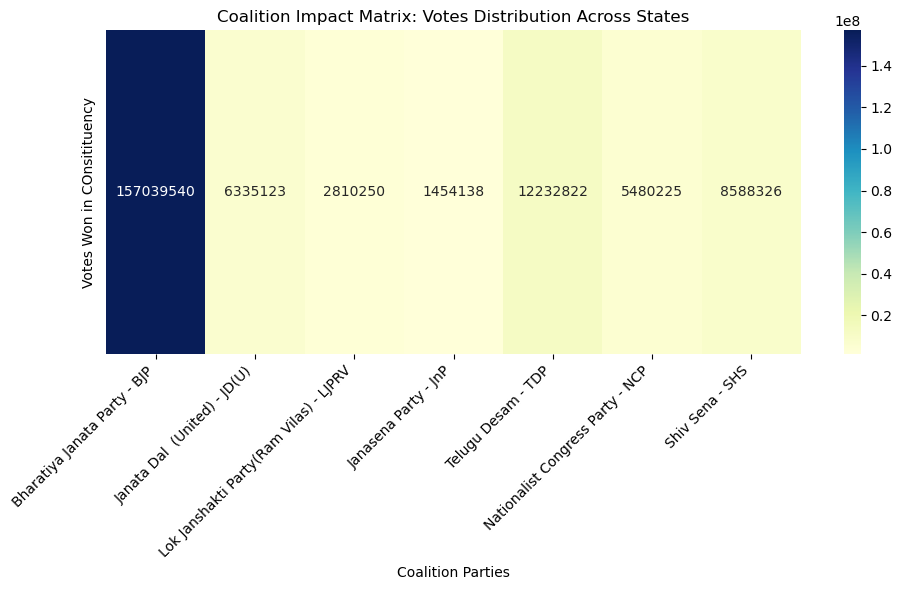

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_folder = 'state'
coalition_parties = {
    'Bharatiya Janata Party - BJP': ['Bharatiya Janata Party - BJP', 'BJP'],
    'Janata Dal  (United) - JD(U)': ['Janata Dal  (United) - JD(U)', 'JD(U)'],
    'Lok Janshakti Party(Ram Vilas) - LJPRV': ['Lok Janshakti Party(Ram Vilas) - LJPRV', 'LJPRV'],
    'Janasena Party - JnP': ['Janasena Party - JnP', 'JnP'],
    'Telugu Desam - TDP': ['Telugu Desam - TDP', 'TDP'],
    'Nationalist Congress Party - NCP': ['Nationalist Congress Party - NCP', 'NCP'],
    'Shiv Sena - SHS': ['Shiv Sena - SHS', 'SHS']
}

def load_election_data(base_folder):
    state_data = {}
    for state_folder in os.listdir(base_folder):
        state_path = os.path.join(base_folder, state_folder)
        if os.path.isdir(state_path):
            state_data[state_folder] = {}
            for party_folder in os.listdir(state_path):
                party_path = os.path.join(state_path, party_folder)
                if os.path.isdir(party_path):
                    for file in os.listdir(party_path):
                        if file.endswith('.csv'):
                            csv_path = os.path.join(party_path, file)
                            df = pd.read_csv(csv_path)
                            if 'Total Votes' in df.columns:
                                df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
                                state_data[state_folder][party_folder] = df
                            else:
                                print(f"Warning: 'Total Votes' column not found in {csv_path}. Skipping.")
    return state_data

def calculate_coalition_votes(state_data, coalition_parties):
    coalition_votes = {party: 0 for party in coalition_parties.keys()}
    
    for state, parties in state_data.items():
        for party, df in parties.items():
            for coalition_party, aliases in coalition_parties.items():
                if any(alias in party for alias in aliases):
                    if 'Total Votes' in df.columns:  
                        total_votes = df['Total Votes'].sum()
                        coalition_votes[coalition_party] += total_votes
                    else:
                        print(f"Warning: 'Total Votes' column not found in {state}/{party}. Skipping.")
    
    return coalition_votes
state_data = load_election_data(base_folder)

coalition_votes = calculate_coalition_votes(state_data, coalition_parties)


heatmap_data = [coalition_votes[party] for party in coalition_parties.keys()]

plt.figure(figsize=(10, 6))
sns.heatmap([heatmap_data], annot=True, cmap='YlGnBu', fmt='.0f', xticklabels=list(coalition_parties.keys()), yticklabels=False)
plt.title('Coalition Impact Matrix: Votes Distribution Across States')
plt.xlabel('Coalition Parties')
plt.ylabel('Votes Won in COnsitituency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Seat Distribution in Maharashtra

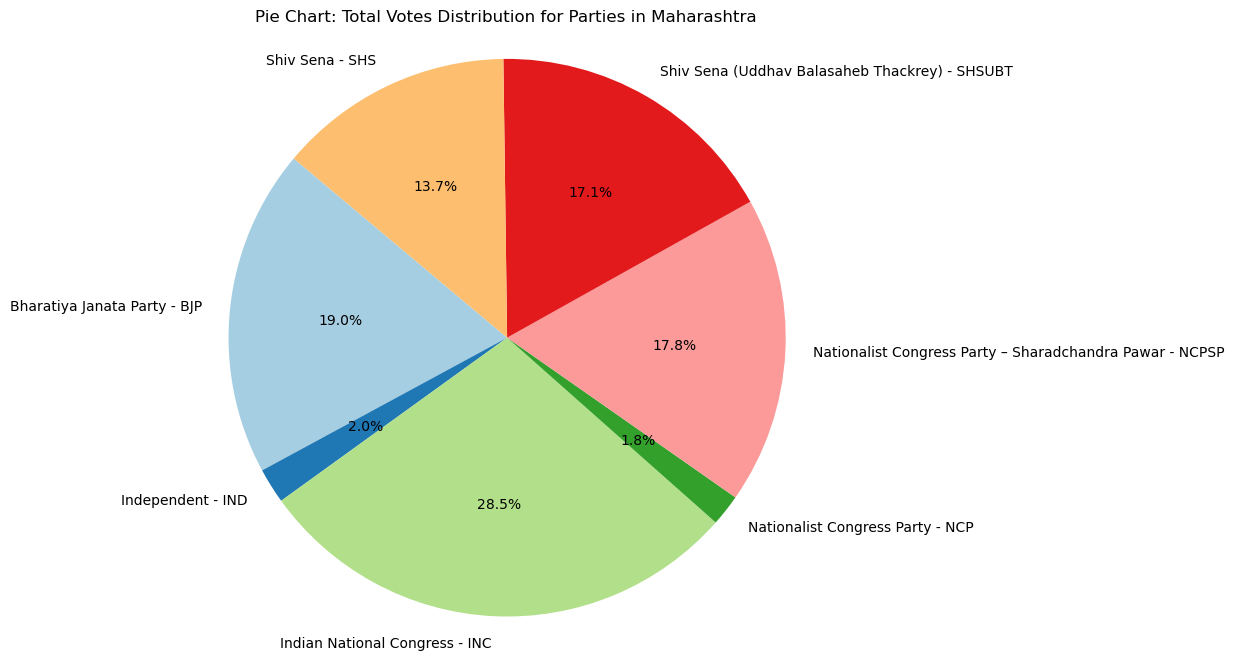

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_folder = 'state'

def load_state_data(state_folder):
    state_data = {}
    state_path = os.path.join(base_folder, state_folder)
    if os.path.isdir(state_path):
        state_data[state_folder] = {}
        for party_folder in os.listdir(state_path):
            party_path = os.path.join(state_path, party_folder)
            if os.path.isdir(party_path):
                for file in os.listdir(party_path):
                    if file.endswith('.csv'):
                        csv_path = os.path.join(party_path, file)
                        df = pd.read_csv(csv_path)
                        state_data[state_folder][party_folder] = df
    return state_data
def extract_total_votes(state_data):
    total_votes = {}
    for party, df in state_data['Maharashtra'].items():
        if 'Total Votes' in df.columns:
            total_votes[party] = df['Total Votes'].sum()
    return total_votes

state_data = load_state_data('Maharashtra')

total_votes = extract_total_votes(state_data)

plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(len(total_votes)))
labels = list(total_votes.keys())
sizes = list(total_votes.values())
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Total Votes Distribution for Parties in Maharashtra')
plt.axis('equal')  
plt.show()


